<a href="https://colab.research.google.com/github/sushantkumar-estech/Celsius-to-Fahrenheit-using-ANN/blob/master/Develop_A_Simple_Neural_Model_to_convert_Celsius_to_Fahrenheit_using_ANN_in_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STEP#0: Import Libraries

In [ ]:
# !pip install tensorflow-gpu==2.0.0.alpha0

In [ ]:
#Installing compatible tensorflow 
!pip install tensorflow
try:
  %tensorflow_version 1.x
except Exception:
  pass

TensorFlow 1.x selected.


In [ ]:
#Importing required libraries for data processing and visualization

import tensorflow as tf
import pandas as pd
import seaborn as sns  # to plot images and statical version of data
import numpy as np
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## STEP #1: Import *Dataset*

In [ ]:
#Mouting colab with the drive

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Importing dataset from drive

temp_df = pd.read_csv('/content/drive/My Drive/ML_Dataset/Celsius to Fahrenheit/Celsius to Fahrenheit.csv')

In [ ]:
temp_df.head() #showing top rows

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [ ]:
temp_df.tail(5) #last 5 rows of the dataset     

,Celsius,Fahrenheit
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [ ]:
temp_df.describe() #description about dataset

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


In [ ]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


`## STEP #2: Visualization of Dataset`

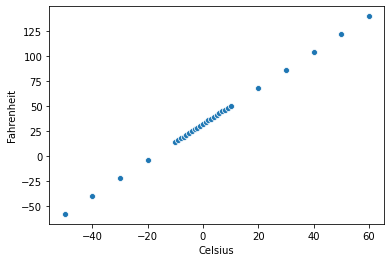

In [ ]:
sns.scatterplot(temp_df['Celsius'], temp_df['Fahrenheit'])

## STEP #3: Creating Training & Testing Dataset

In [ ]:
X_train = temp_df['Celsius']
y_train = temp_df['Fahrenheit']

## STEP #4: Build & Train the Model

In [ ]:
X_train.shape

(30,)

In [ ]:
y_train.shape

(30,)

In [ ]:
# in tensorflow 2.0, keras API come automatically with tensorflow 2.0
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units= 10 , input_shape = (1,)))
#Dense when we have fully connected atificial neural network
# now we are adding one more layer to the network
model.add(tf.keras.layers.Dense(units = 10))
# now adding the output layer
model.add(tf.keras.layers.Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_45 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer= tf.keras.optimizers.Adam(1), loss = 'mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs=100)

Train on 30 samples
Epoch 1/100
30/30 [==============================] - 1s 20ms/sample - loss: 3268.1162
Epoch 2/100
30/30 [==============================] - 0s 198us/sample - loss: 61145.6016
Epoch 3/100
30/30 [==============================] - 0s 189us/sample - loss: 1798122.2500
Epoch 4/100
30/30 [==============================] - 0s 186us/sample - loss: 85417.1953
Epoch 5/100
30/30 [==============================] - 0s 108us/sample - loss: 5350.3647
Epoch 6/100
30/30 [==============================] - 0s 106us/sample - loss: 67490.9766
Epoch 7/100
30/30 [==============================] - 0s 132us/sample - loss: 683866.1875
Epoch 8/100
30/30 [==============================] - 0s 222us/sample - loss: 8559.7334
Epoch 9/100
30/30 [==============================] - 0s 119us/sample - loss: 967088.6250
Epoch 10/100
30/30 [==============================] - 0s 123us/sample - loss: 7190.4424
Epoch 11/100
30/30 [==============================] - 0s 103us/sample - loss: 750904.3750
Epoch 12/1

## STEP #5: Evaluating the Model

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss'])

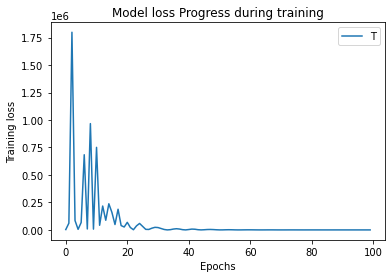

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model loss Progress during training')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend('Training loss')
plt.show()

In [ ]:
model.get_weights()

[array([[-0.61971986,  0.01195671, -0.59212005, -0.45683125, -0.02921879,
         -0.05662349, -0.03264236,  0.02024923, -0.44477683,  0.03591322]],
       dtype=float32),
 array([-2.6420949 , -0.39772347, -3.1462486 , -1.3264107 , -0.03893621,
         1.0141823 ,  0.50277054,  0.8993053 ,  3.980241  , -0.53568846],
       dtype=float32),
 array([[-1.4054306 , -0.28386906, -0.70785004, -0.200296  , -1.0167828 ,
         -0.7535688 , -0.14680028,  0.36481923, -0.81497383,  0.03124018],
        [-0.7706648 , -0.04107166,  3.218549  , -0.43200916,  3.9725113 ,
          3.5589848 ,  0.62615806, -1.7409754 ,  3.5530763 ,  1.2832867 ],
        [-1.4872667 , -0.08818862, -0.45731273, -0.16456333, -0.9054678 ,
         -0.9847047 , -0.42396182, -0.01467231, -0.6703229 ,  0.04073911],
        [-1.1012689 ,  0.0959546 , -0.7046379 ,  0.6073303 , -0.6278147 ,
         -0.6440739 , -0.27232566, -0.35170144, -0.8084434 , -0.13024342],
        [-0.90911335, -0.17928042, -3.3125517 ,  0.6178597 , 

In [ ]:
# Use the same model to perform predictions
Temp_C = 12
Temp_F = model.predict([Temp_C])
print('Temprature in Fahrenheit using simple ANN=', Temp_F)

Temprature in Fahrenheit using simple ANN= [[52.688072]]


In [ ]:
# Lets confirm with the equation
Temp_F = 9/5 * Temp_C + 32
print('Temprature in Fahrenheit using normal equation=', Temp_F)

Temprature in Fahrenheit using normal equation= 53.6
